In [1]:
import src.net as net
import sklearn.metrics
import torch.nn as nn
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import importlib
import src.params as params
import src.main as main
import src.dataloader as dataloader
import torch.nn.functional as F
import pandas as pd
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
import src.preprocess as preprocess
from copy import copy
import src.feature_extraction as feature_extraction
import sys, os, torch
import re
importlib.reload(dataloader)
importlib.reload(preprocess)
importlib.reload(feature_extraction)
importlib.reload(net)

<module 'src.net' from '/home/junetheriver/code/aiops/src/net.py'>

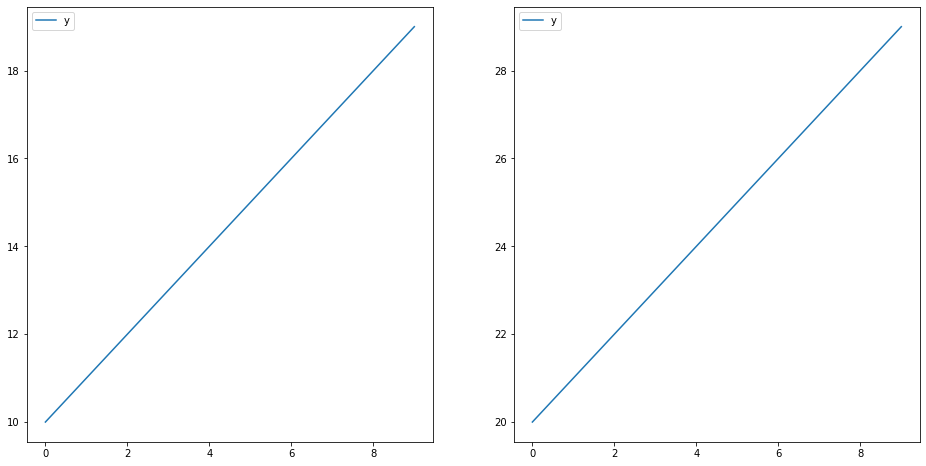

In [5]:
x = range(10)
y1 = range(10,20)
y2 = range(20,30)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
axes[0].plot(x, y1)
axes[0].legend('y1')
axes[1].plot(x, y2)
axes[1].legend('y2')

In [35]:
import pickle
ts1 = "../../workdir/system_a/bak/(-2, 8)_timeseries.pkl"
ts2 = "../../workdir/system_a/(-2, 8)_timeseries.pkl"
with open(ts1, 'rb') as f1:
    with open(ts2, 'rb') as f2:
        a = pickle.load(f1)
        b = pickle.load(f2)

In [36]:
a['ts']

,id,timestamp,system.load.norm.5,weblogic.webapp.current.sessions,system.net.udp.out_datagrams,system.net.udp.rcv_buf_errors,haproxy.frontend.response.2xx,haproxy.backend.session.pct,redis.clients.blocked,haproxy.frontend.errors.req_rate,...,haproxy.backend.session.rate,haproxy.backend.session.current,redis.mem.used,system.cpu.i_dle,system.tcp.last_ack,haproxy.frontend.response.4xx,system.io.await,haproxy.frontend.bytes.in_rate,system.net.bytes_sent,system.mem.pct_usage
0,0,0,-0.608943,-0.721698,2.966867,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.652528,-0.036594,0.000000,-0.273529,0.000000,-0.641659,0.743329
1,0,1,-0.608943,-0.719341,0.211497,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.516414,-0.036594,0.000000,-0.379578,0.000000,-0.618053,0.631746
2,0,2,-0.936100,-0.719341,1.244761,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.668732,-0.036594,0.000000,-0.379578,0.000000,-0.666474,0.610288
3,0,3,-0.936100,-0.719341,0.211497,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.681696,-0.036594,0.000000,-0.379578,0.000000,-0.667136,1.181077
4,0,4,-0.936100,-0.719341,0.211497,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.707622,-0.036594,0.000000,-0.379578,0.000000,-0.671255,1.181077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,377,5,-0.119793,0.000000,-0.704046,0.0,-0.618499,-0.150419,0.0,-1.285992,...,-0.651438,-0.179581,0.0,0.306663,2.079932,-0.027278,-0.053733,-0.663846,-0.684096,-0.966893
6,377,6,-0.255176,0.000000,-0.683221,0.0,-0.618499,-0.150419,0.0,-1.285992,...,-0.651438,-0.179581,0.0,0.411808,4.209220,-0.027278,-0.053733,-0.663846,-0.667084,-0.966893
7,377,7,-0.255176,0.000000,-0.650736,0.0,-0.618499,-0.150419,0.0,-1.285992,...,-0.651438,-0.179581,0.0,0.273017,-0.049356,-0.027278,-0.053733,-0.663846,-0.632659,-0.970884
8,377,8,-0.255176,0.000000,-0.619416,0.0,-0.618499,-0.150419,0.0,-1.285992,...,-0.651438,-0.179581,0.0,0.411808,-0.049356,-0.027278,-0.053733,-0.663846,-0.608468,-0.970884


In [37]:
b['ts']

,id,timestamp,haproxy.backend.bytes.out_rate,haproxy.backend.connect.time,haproxy.backend.response.2xx,haproxy.backend.response.time,haproxy.backend.session.current,haproxy.backend.session.pct,haproxy.backend.session.time,haproxy.backend_up,...,weblogic.basic.active.sockets.connections,weblogic.basic.can_used.heap.size,weblogic.basic.heap.size,weblogic.can_connect,weblogic.cluster.status,weblogic.jdbc.active_conn_avg,weblogic.servlet.execute.time_avg,weblogic.webapp.current.sessions,weblogic.webapp.session_max,weblogic.webapp.sessions
0,0,0,0.0,-0.750805,-0.608943,-0.036594,-0.273529,0.281986,-0.151162,0.0,...,0.000000,0.0,0.730875,-0.079072,0.000000,1.323564,-0.599539,-0.724086,-0.045744,0.000000
1,0,1,0.0,-0.750805,-0.608943,-0.036594,-0.379578,0.282710,-0.245266,0.0,...,0.000000,0.0,0.617149,-0.079072,0.000000,1.410734,-0.470796,-0.724086,-0.045744,0.000000
2,0,2,0.0,-0.750805,-0.936100,-0.036594,-0.379578,0.282951,-0.245266,0.0,...,0.000000,0.0,0.595487,-0.079072,0.000000,1.497903,-0.470796,-0.724086,2.357698,0.000000
3,0,3,0.0,-0.750805,-0.936100,-0.036594,-0.379578,0.281021,-0.245266,0.0,...,0.000000,0.0,1.173594,-0.079072,0.000000,1.323564,-0.470796,-0.724086,3.887162,0.000000
4,0,4,0.0,-0.750805,-0.936100,-0.036594,-0.379578,0.281262,-0.245266,0.0,...,0.000000,0.0,1.176301,-0.079072,0.000000,1.410734,-0.470796,-0.724086,5.416625,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,377,5,0.0,-0.235895,-0.119793,2.079932,-0.053733,-0.403336,-0.042664,0.0,...,-0.651438,0.0,-1.009948,-0.112084,-0.663846,-0.883442,0.000000,-0.403123,16.683296,-0.640763
6,377,6,0.0,-0.406707,-0.255176,4.209220,-0.053733,-0.403336,-0.042664,0.0,...,-0.651438,0.0,-1.009948,-0.112084,-0.663846,-0.883442,0.000000,-0.403123,12.079689,-0.640763
7,377,7,0.0,-0.492112,-0.255176,-0.049356,-0.053733,-0.403336,-0.042664,0.0,...,-0.651438,0.0,-1.009948,-0.112084,-0.663846,-0.967526,0.000000,-0.403123,7.057572,-0.640763
8,377,8,0.0,-0.235895,-0.255176,-0.049356,-0.053733,-0.402467,-0.042664,0.0,...,-0.651438,0.0,-1.012478,-0.112084,-0.663846,-0.967526,0.000000,-0.403123,-0.057093,-0.640763


In [15]:
a['ts']

,id,timestamp,system.load.norm.5,weblogic.webapp.current.sessions,system.net.udp.out_datagrams,system.net.udp.rcv_buf_errors,haproxy.frontend.response.2xx,haproxy.backend.session.pct,redis.clients.blocked,haproxy.frontend.errors.req_rate,...,haproxy.backend.session.rate,haproxy.backend.session.current,redis.mem.used,system.cpu.i_dle,system.tcp.last_ack,haproxy.frontend.response.4xx,system.io.await,haproxy.frontend.bytes.in_rate,system.net.bytes_sent,system.mem.pct_usage
0,0,0,-0.608943,-0.721698,2.966867,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.652528,-0.036594,0.000000,-0.273529,0.000000,-0.641659,0.743329
1,0,1,-0.608943,-0.719341,0.211497,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.516414,-0.036594,0.000000,-0.379578,0.000000,-0.618053,0.631746
2,0,2,-0.936100,-0.719341,1.244761,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.668732,-0.036594,0.000000,-0.379578,0.000000,-0.666474,0.610288
3,0,3,-0.936100,-0.719341,0.211497,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.681696,-0.036594,0.000000,-0.379578,0.000000,-0.667136,1.181077
4,0,4,-0.936100,-0.719341,0.211497,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.707622,-0.036594,0.000000,-0.379578,0.000000,-0.671255,1.181077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,377,5,-0.119793,0.000000,-0.704046,0.0,-0.618499,-0.150419,0.0,-1.285992,...,-0.651438,-0.179581,0.0,0.306663,2.079932,-0.027278,-0.053733,-0.663846,-0.684096,-0.966893
6,377,6,-0.255176,0.000000,-0.683221,0.0,-0.618499,-0.150419,0.0,-1.285992,...,-0.651438,-0.179581,0.0,0.411808,4.209220,-0.027278,-0.053733,-0.663846,-0.667084,-0.966893
7,377,7,-0.255176,0.000000,-0.650736,0.0,-0.618499,-0.150419,0.0,-1.285992,...,-0.651438,-0.179581,0.0,0.273017,-0.049356,-0.027278,-0.053733,-0.663846,-0.632659,-0.970884
8,377,8,-0.255176,0.000000,-0.619416,0.0,-0.618499,-0.150419,0.0,-1.285992,...,-0.651438,-0.179581,0.0,0.411808,-0.049356,-0.027278,-0.053733,-0.663846,-0.608468,-0.970884
